In [2]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
java_mutants = pd.read_csv('data/java_mutations.csv')
racket_mutants = pd.read_csv('data/racket_mutations.csv')

In [5]:
racket_mutants_filtered = racket_mutants.copy()
def test_if_else_to_true(row):
    if row["MutatorType"] == "RC-cond->true":
        if "else" in row["MutantSource"] and "else" not in row["MutantDestination"]:
            return False
    return True
racket_mutants_filtered = racket_mutants_filtered[racket_mutants_filtered.apply(test_if_else_to_true, axis=1)]
racket_mutants_filtered["mutant_type"] = racket_mutants["MutatorType"]
racket_mutants_filtered["assignment_no"] = racket_mutants["MutantSourceFile"].apply(lambda x : x.split("/")[-3])
racket_mutants_filtered["status"] = racket_mutants["Result"].apply(lambda x : "KILLED" if x == "failed" else "SURVIVED")
racket_mutants_filtered["project_no"] = racket_mutants["MutantSourceFile"].apply(lambda x : x.split("/")[-2])
racket_mutants_filtered["language"] = "racket"
racket_mutants_filtered["num_mutants"] = 1
racket_mutants_filtered = racket_mutants_filtered[["mutant_type", "assignment_no", "status", "num_mutants", "project_no", "language"]]
racket_mutants_filtered

,mutant_type,assignment_no,status,num_mutants,project_no,language
0,RC-match-removal,Assignment5,KILLED,1,shuffled-22,racket
1,RC-match-removal,Assignment5,KILLED,1,shuffled-22,racket
2,RC-match-removal,Assignment5,KILLED,1,shuffled-22,racket
3,RC-match-removal,Assignment5,KILLED,1,shuffled-22,racket
4,RC-match-removal,Assignment5,KILLED,1,shuffled-22,racket
...,...,...,...,...,...,...
35094,RC-cond->false,Assignment2,KILLED,1,shuffled-55,racket
35095,RC-cond->true,Assignment2,KILLED,1,shuffled-55,racket
35097,RC-cond->false,Assignment2,KILLED,1,shuffled-55,racket
35098,RC-cond->false,Assignment2,KILLED,1,shuffled-55,racket


In [6]:
racket_mutants_compressed = racket_mutants_filtered.copy()
racket_mutants_compressed["num_mutants"] = racket_mutants_filtered.groupby(["mutant_type", "assignment_no", "status", "project_no", "language"])["num_mutants"].transform('count')
racket_mutants_compressed = racket_mutants_compressed.drop_duplicates()
racket_mutants_compressed

,mutant_type,assignment_no,status,num_mutants,project_no,language
0,RC-match-removal,Assignment5,KILLED,19,shuffled-22,racket
6,RC-if->true,Assignment5,KILLED,10,shuffled-22,racket
24,RC-match-removal,Assignment2,KILLED,15,shuffled-68,racket
27,RC-if->true,Assignment2,KILLED,10,shuffled-68,racket
44,RC-match-removal,Assignment3,KILLED,22,shuffled-46,racket
...,...,...,...,...,...,...
35065,RC-and->true,Assignment2,KILLED,4,shuffled-55,racket
35067,RC-and->false,Assignment2,SURVIVED,2,shuffled-55,racket
35085,aod-add,Assignment2,SURVIVED,1,shuffled-55,racket
35093,RC-cond->false,Assignment2,KILLED,4,shuffled-55,racket


In [7]:
# Join the two dataframes
mutants = pd.concat([java_mutants, racket_mutants_compressed])
# mutants
mutants.to_csv('data/all_mutants.csv', index=False)

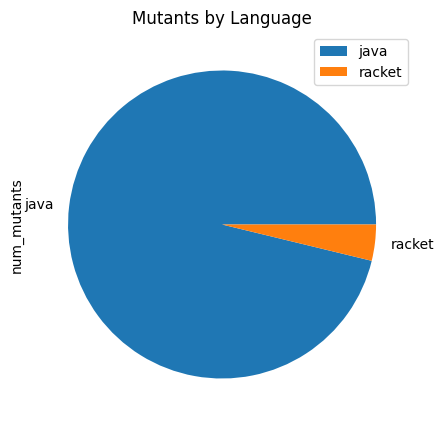

,mutant_type,assignment_no,status,num_mutants,project_no
language,,,,,
java,InlineConstantMutatorNonVoidMethodCallMutatorC...,??????????????????????????????????????????????...,KILLEDKILLEDKILLEDKILLEDKILLEDKILLEDKILLEDKILL...,1707987,fszgvwgditfszgvwgditfszgvwgditfszgvwgditfszgvw...
racket,RC-match-removalRC-if->trueRC-match-removalRC-...,Assignment5Assignment5Assignment2Assignment2As...,KILLEDKILLEDKILLEDKILLEDKILLEDSURVIVEDKILLEDKI...,67274,shuffled-22shuffled-22shuffled-68shuffled-68sh...


In [8]:
# pie chart of mutants by language
mutants_by_language = mutants.groupby("language").sum()
mutants_by_language.plot.pie(y='num_mutants', figsize=(5, 5))
plt.title('Mutants by Language')
plt.show()
# print the number of mutants by language
mutants_by_language



In [9]:
racket_mutants = mutants[mutants["language"] == "racket"]
java_mutants = mutants[mutants["language"] == "java"]

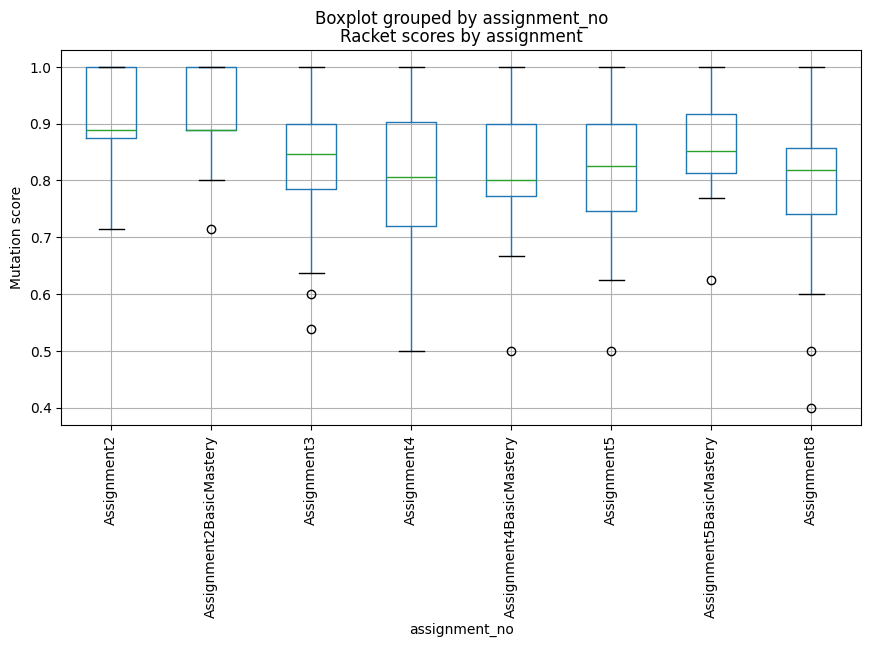

In [10]:
# boxplot of mutation score  by assignment for racket and 
racket_mutation_score = racket_mutants.groupby(["assignment_no", "project_no"])["status"].value_counts(normalize=True).unstack().fillna(0)["KILLED"]
racket_mutation_score = racket_mutation_score.reset_index()
racket_mutation_score.boxplot(column='KILLED', by='assignment_no', figsize=(10, 5))
plt.title('Racket scores by assignment')
plt.xticks(rotation=90)
plt.ylabel('Mutation score')
plt.show()

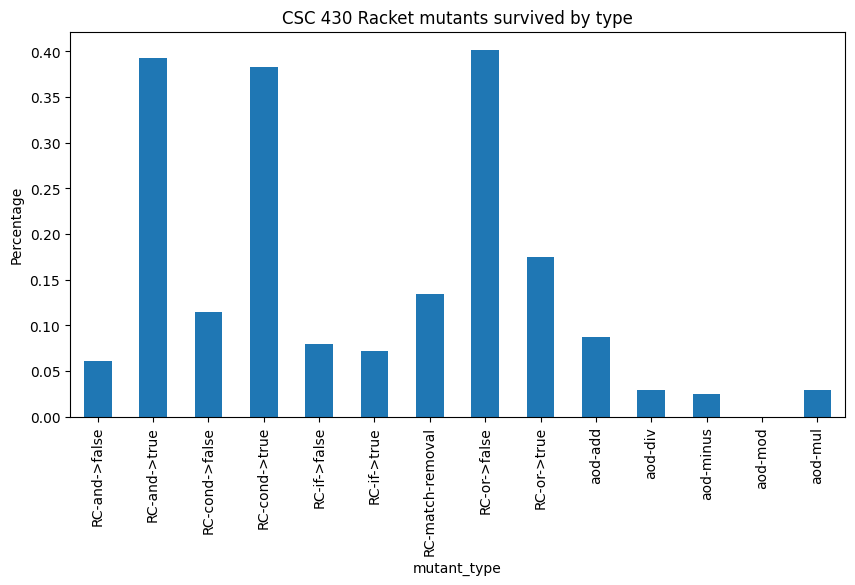

In [11]:
# barchart of % survived by mutant type for both racket and java
racket_mutants_survived_by_type = racket_mutants.groupby("mutant_type")["status"].value_counts(normalize=True).unstack()["SURVIVED"]
racket_mutants_survived_by_type.plot.bar(figsize=(10, 5))
plt.title('CSC 430 Racket mutants survived by type')
plt.ylabel('Percentage')
plt.show()

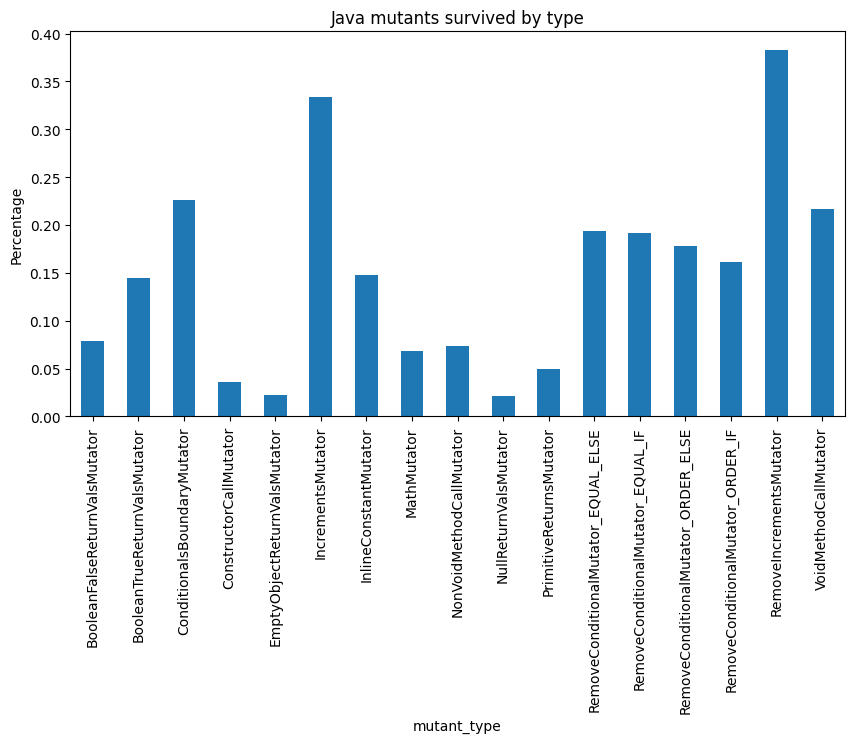

In [12]:
java_mutants_survived_by_type = java_mutants.groupby("mutant_type")["status"].value_counts(normalize=True).unstack()["SURVIVED"]
java_mutants_survived_by_type.plot.bar(figsize=(10, 5))
plt.title('Java mutants survived by type')
plt.ylabel('Percentage')
plt.show()

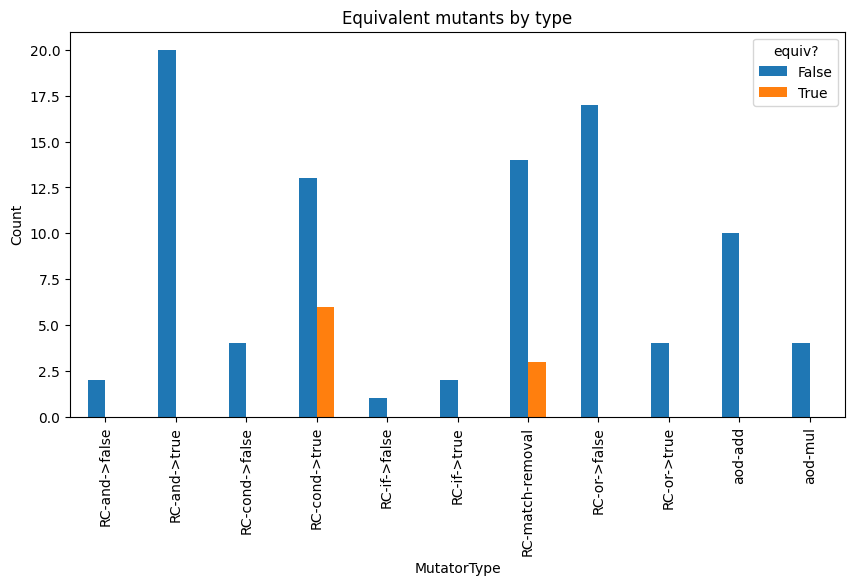

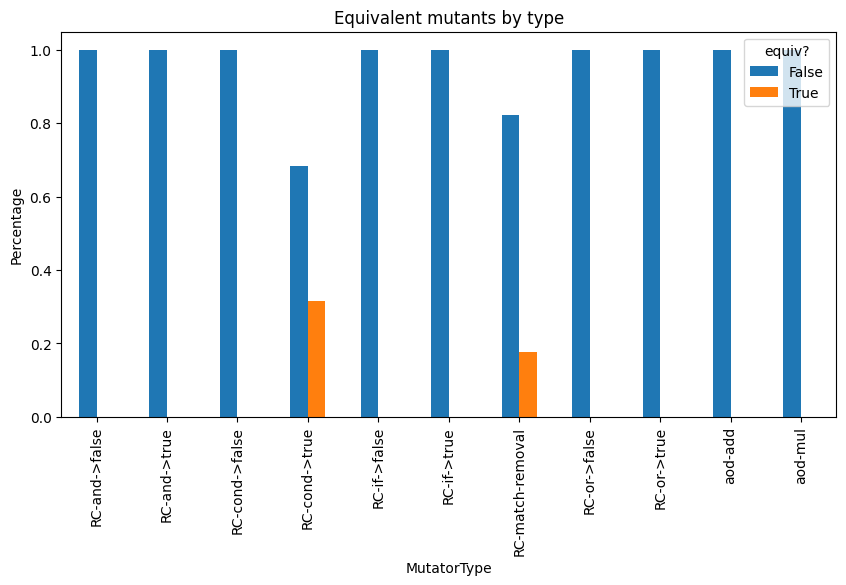

In [13]:
human_mutants = pd.read_csv('data/racket_human_subset.csv')
human_mutants = human_mutants[["MutatorType", "equiv?"]]
human_mutants
# plot # of equivalent mutants by mutator type
human_mutants.groupby("MutatorType")["equiv?"].value_counts().unstack().fillna(0).plot.bar(figsize=(10, 5))
plt.title('Equivalent mutants by type')
plt.ylabel('Count')
plt.show()

# same plot but as a percentage
human_mutants.groupby("MutatorType")["equiv?"].value_counts(normalize=True).unstack().fillna(0).plot.bar(figsize=(10, 5))
plt.title('Equivalent mutants by type')
plt.ylabel('Percentage')
plt.show()

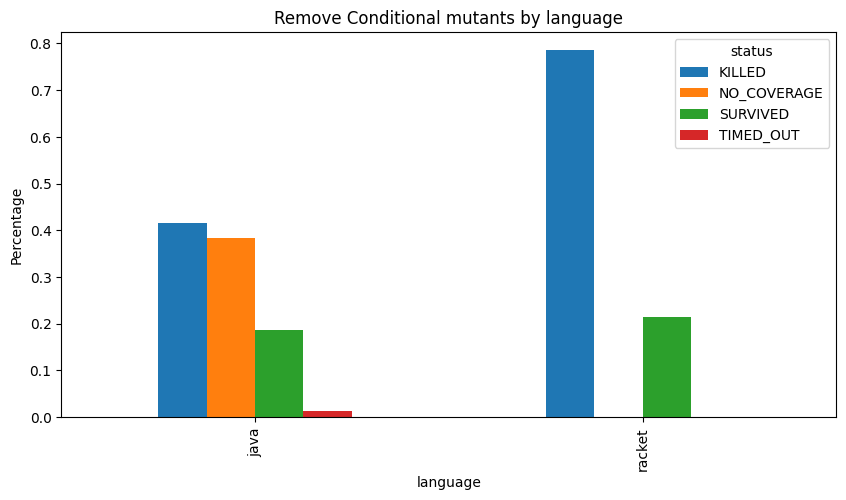

In [14]:
racket_combined = racket_mutants.copy()
racket_combined["PIT-mutation_type"] = racket_combined["mutant_type"].apply(lambda x : x.split("-")[0])
java_compressed = java_mutants.copy()
java_compressed["PIT-mutation_type"] = java_compressed["mutant_type"].apply(lambda x : "RC" if "RemoveConditionalMutator" in x else x)
java_compressed

# join the two dataframes, group by the new column and count only RC mutants
combined = pd.concat([racket_combined, java_compressed])
combined = combined[combined["PIT-mutation_type"] == "RC"]
combined.groupby("language")["status"].value_counts(normalize=True).unstack().fillna(0).plot.bar(figsize=(10, 5))
plt.title('Remove Conditional mutants by language')
plt.ylabel('Percentage')
plt.show()


<Axes: xlabel='MutatorType'>

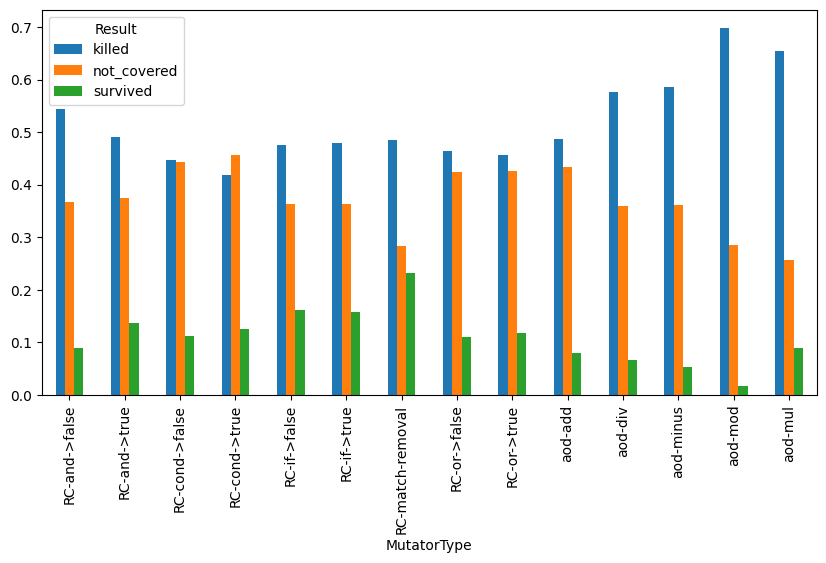

In [15]:
import pandas as pd
open_source_mutants = pd.read_csv('data/open_source_mutants.csv')
# boxplot of mutants by type
open_source_mutants.groupby("MutatorType")["Result"].value_counts(normalize=True).unstack().fillna(0).plot.bar(figsize=(10, 5))

In [16]:
# Percent survived for open source projecs
open_source_mutants["Result"].value_counts(normalize=True)

Result
killed         0.496061
not_covered    0.386903
survived       0.117036
Name: proportion, dtype: float64

In [17]:
# Percent survived for java CSC305
java_mutants["status"].value_counts(normalize=True)

status
KILLED         0.473769
NO_COVERAGE    0.400000
SURVIVED       0.120275
TIMED_OUT      0.005956
Name: proportion, dtype: float64

In [18]:
# percent survived for racket CSC480
racket_mutants["status"].value_counts(normalize=True)

status
KILLED      0.829912
SURVIVED    0.170088
Name: proportion, dtype: float64

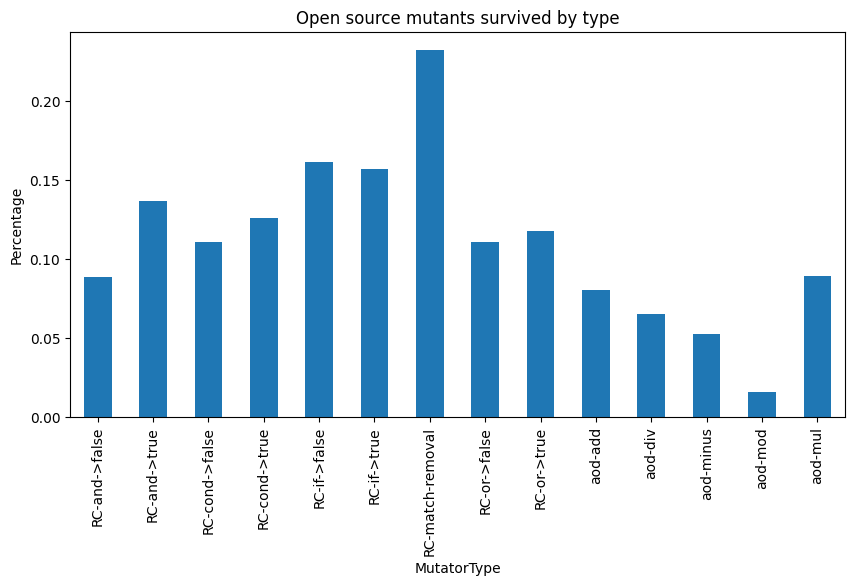

In [19]:
# barchart of % survived by mutant type for open source and java
open_source_mutants_survived_by_type = open_source_mutants.groupby("MutatorType")["Result"].value_counts(normalize=True).unstack()["survived"]
open_source_mutants_survived_by_type.plot.bar(figsize=(10, 5))
plt.title('Open source mutants survived by type')
plt.ylabel('Percentage')
plt.show()


Result              killed  not_covered  survived
MutatorType                                      
RC-and->false     0.544375     0.367439  0.088185
RC-and->true      0.489843     0.373767  0.136390
RC-cond->false    0.446481     0.442732  0.110787
RC-cond->true     0.418774     0.455637  0.125589
RC-if->false      0.475506     0.363161  0.161332
RC-if->true       0.480078     0.363161  0.156760
RC-match-removal  0.484174     0.283705  0.232122
RC-or->false      0.464509     0.424843  0.110647
RC-or->true       0.456250     0.426042  0.117708
aod-add           0.486019     0.434088  0.079893
aod-div           0.576520     0.358491  0.064990
aod-minus         0.586151     0.361514  0.052335
aod-mod           0.698413     0.285714  0.015873
aod-mul           0.654183     0.256574  0.089243


Text(0.5, 1.0, 'Open source mutants coverage vs survival')

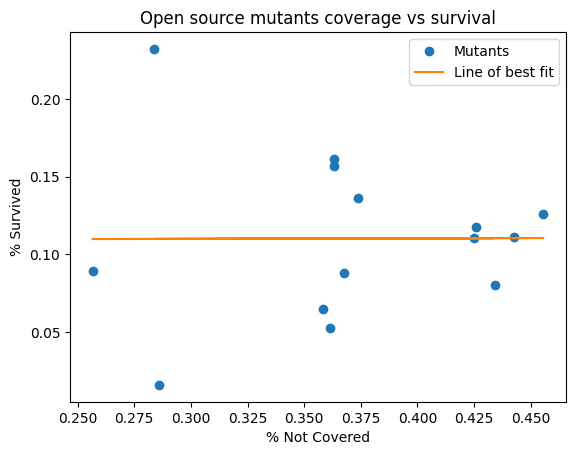

In [20]:
import numpy as np
# open source mutants coverage vs survival scatter plot
grouped = open_source_mutants.groupby("MutatorType")["Result"].value_counts(normalize=True).unstack().fillna(0)
print(grouped)
plt.plot(grouped["not_covered"], grouped["survived"], 'o')
# line of best fit
m, b = np.polyfit(grouped["not_covered"], grouped["survived"], 1)
plt.plot(grouped["not_covered"], m*grouped["not_covered"] + b)
plt.legend(['Mutants', 'Line of best fit'])

plt.xlabel('% Not Covered')
plt.ylabel('% Survived')
plt.title('Open source mutants coverage vs survival')

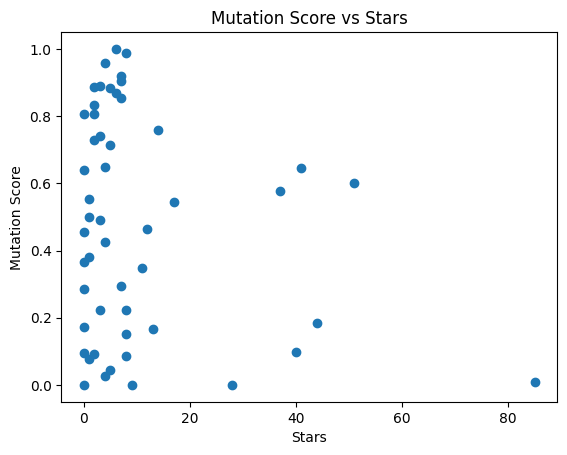

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

df = pd.read_csv("data/open_source_mutants.csv")
green_projects = pd.read_csv("data/green_projects.csv")
green_projects_list = green_projects["project"].to_list()
stars_df = pd.read_csv("data/stars.csv")

df["project"] = df["file"].apply(lambda x: x.split("/")[2])

data = []
unfinished_projects = []
for project in green_projects_list:
    subset = df[df["project"] == project]
    if len(subset) == 0:
        unfinished_projects.append(project)
        continue
    mutation_score = len(subset[subset["Result"] == "killed"]) / len(subset)
    stars = stars_df[stars_df["project"] == project]["stars"].values[0]
    coverage = green_projects[green_projects["project"] == project]["coverage"].values[0]
    size = green_projects[green_projects["project"] == project]["size"].values[0]
    data.append({"project": project, "mutation_score": mutation_score, "stars": stars, "coverage": coverage, "size": size})


df = pd.DataFrame(data)
df = df.sort_values("stars")
plt.scatter(df["stars"], df["mutation_score"])
plt.xlabel("Stars")
plt.ylabel("Mutation Score")
plt.title("Mutation Score vs Stars")
plt.show()

p value:  0.4370935522001632


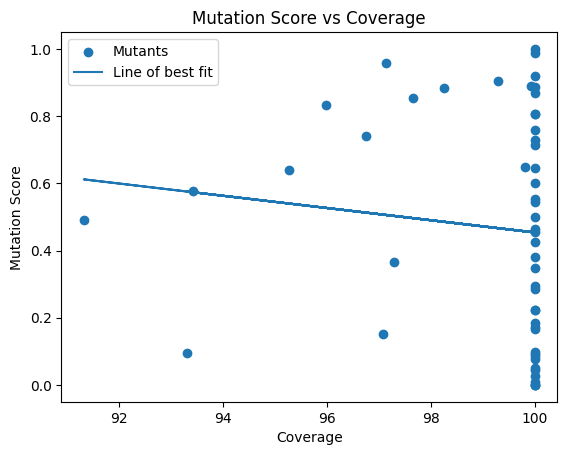

In [22]:
plt.scatter(df["coverage"], df["mutation_score"])
# line of best fit
m, b = np.polyfit(df["coverage"], df["mutation_score"], 1)
# p value
slope, intercept, r_value, p_value, std_err = linregress(df["coverage"], df["mutation_score"])
print("p value: ", p_value)
plt.plot(df["coverage"], m*df["coverage"] + b)
plt.legend(['Mutants', 'Line of best fit'])
plt.xlabel("Coverage")
plt.ylabel("Mutation Score")
plt.title("Mutation Score vs Coverage")
plt.show()

p value: 0.005975986797389108


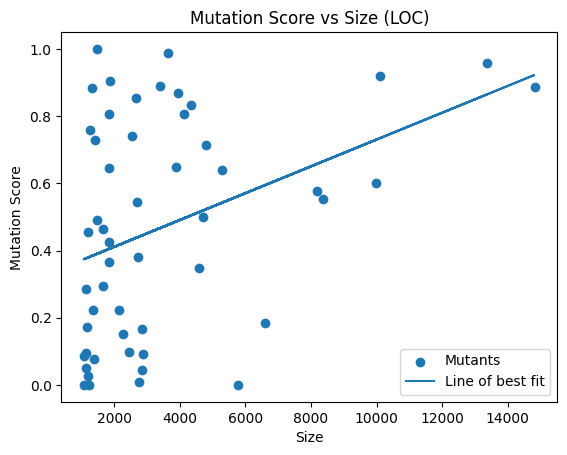

In [23]:
plt.scatter(df["size"], df["mutation_score"])
# line of best fit
m, b = np.polyfit(df["size"], df["mutation_score"], 1)
plt.plot(df["size"], m*df["size"] + b)
# p value
slope, intercept, r_value, p_value, std_err = linregress(df["size"], df["mutation_score"])
print("p value:", p_value)
plt.legend(['Mutants', 'Line of best fit'])
plt.xlabel("Size")
plt.ylabel("Mutation Score")
plt.title("Mutation Score vs Size (LOC)")
plt.show()

p value: 0.6542847896240263


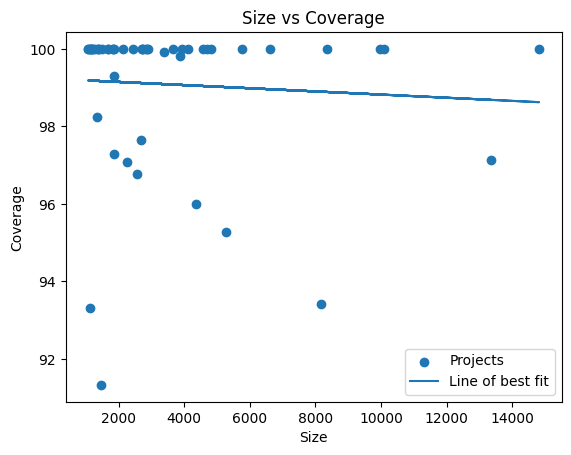

In [29]:
# size vs coverage
plt.scatter(df["size"], df["coverage"])
# line of best fit
m, b = np.polyfit(df["size"], df["coverage"], 1)
# p value
slope, intercept, r_value, p_value, std_err = linregress(df["size"], df["coverage"])
print("p value:", p_value)
plt.plot(df["size"], m*df["size"] + b)
plt.legend(['Projects', 'Line of best fit'])
plt.xlabel("Size")
plt.ylabel("Coverage")
plt.title("Size vs Coverage")
plt.show()

p value: nan


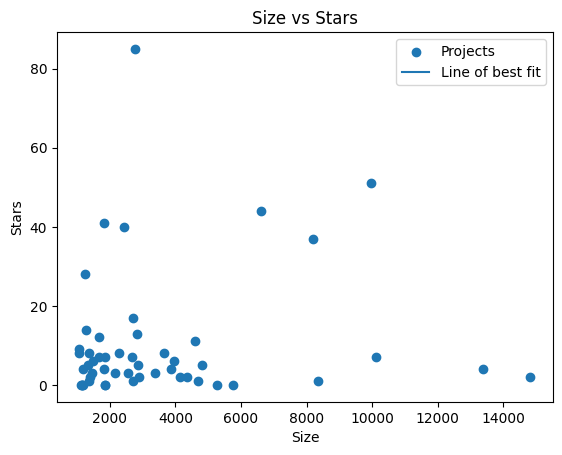

In [30]:
# size vs stars
plt.scatter(df["size"], df["stars"])
# line of best fit
m, b = np.polyfit(df["size"], df["stars"], 1)
# p value
slope, intercept, r_value, p_value, std_err = linregress(df["size"], df["stars"])
print("p value:", p_value)
plt.plot(df["size"], m*df["size"] + b)
plt.legend(['Projects', 'Line of best fit'])
plt.xlabel("Size")
plt.ylabel("Stars")
plt.title("Size vs Stars")
plt.show()


In [26]:
macket_mutations = pd.read_csv('data/macket_mutations.csv')
macket_mutations

,MutatorType,Result,MutantSourceFile,Replacement,MutantSourceLine,MutantSourceColumn,MutantDestinationLine,MutantDestinationColumn
0,EmptyStringMutator,Timeout,repos/plisqin/plisqin-doc/scribblings/standard...,"""""",6,24,6,36
1,EmptyStringMutator,Timeout,repos/plisqin/plisqin-doc/scribblings/standard...,"""""",11,10,11,22
2,ArithmeticMutator,Killed,repos/simple-svg/simple-svg/src/defines/path/q...,+,6,29,6,30
3,ArithmeticMutator,Killed,repos/simple-svg/simple-svg/src/defines/path/q...,+,10,30,10,31
4,ArithmeticDeletionMutator,Killed,repos/simple-svg/simple-svg/src/defines/path/q...,>,6,28,9,35
...,...,...,...,...,...,...,...,...
3315,NumLiteralsMutator,Survived,repos/gdlisp/examples/macros.rkt,0,3,18,3,19
3316,NumLiteralsMutator,Survived,repos/gdlisp/examples/macros.rkt,-1,3,18,3,19
3317,NumLiteralsMutator,Survived,repos/gdlisp/examples/macros.rkt,1,3,18,3,19
3318,NumLiteralsMutator,Survived,repos/gdlisp/examples/macros.rkt,3.0,3,18,3,19


<Axes: xlabel='MutatorType'>

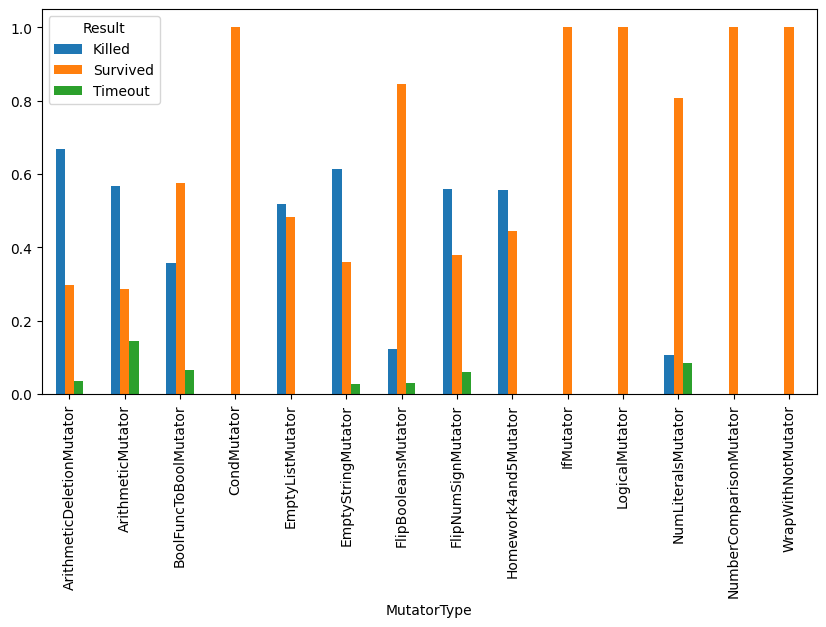

In [27]:
# Survial by type
macket_mutations.groupby("MutatorType")["Result"].value_counts(normalize=True).unstack().fillna(0).plot.bar(figsize=(10, 5))

In [28]:
# the above agree with the RC mutants being the most important for both languages